In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('../data/processed/cleaned_weather_data.csv')
df['date']=pd.to_datetime(df['date'])
df.head()

,temp_max,temp_min,precipitation,wind_speed,humidity,city,date
0,27.4,20.4,3.6,25.1,97,Houston,2022-11-03
1,28.3,20.6,45.1,32.9,98,Houston,2022-11-04
2,21.0,14.1,19.0,26.9,96,Houston,2022-11-05
3,28.3,15.9,3.5,16.4,97,Houston,2022-11-06
4,27.9,20.7,0.3,14.3,100,Houston,2022-11-07


In [4]:
df["month"]=df["date"].dt.month_name()
df["month_num"]=df["date"].dt.month
df["year"]=df["date"].dt.year

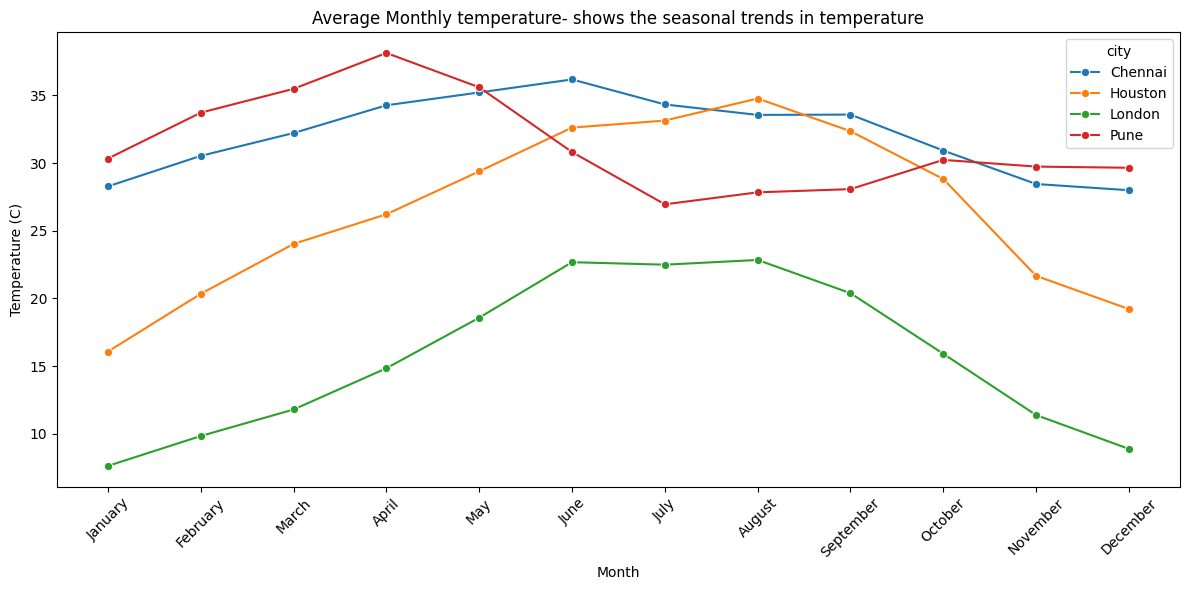

In [ ]:
#Monthly Average temperature for the 4 cities in the years 2022 Nov to 2025 Oct
monthly_avg=(
    df.groupby(["city","month_num","month"])["temp_max"].mean().reset_index().sort_values("month_num")
)
#reset index ensures that the index is 0,1,2...after some operation like sorting,filtering etc after which the index might become non-sequential
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x="month",y="temp_max",hue='city',marker="o") #marker is to highlight individual data points in a grpah. it can be o for circle, s for square * for star + for plus and x for x
#when you mention a column as hue then seaborn assigns a distinct color to each unique category within that column 
plt.title("Average Monthly temperature- Shows the seasonal trends in temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.xticks(rotation=45) #tilts the x axis labels by 45 deg in the anti clockwise 
plt.tight_layout() #to ensure a neat and appealing figure ensuring there are no overalapping
plt.savefig("../output/seasonal_temperature_trend.png")
plt.show()

In [5]:
#Average weather comparison across the 4 cities over a span of 3 years from nov 2022 to oct 2025
summary=df.groupby("city")[["temp_max","temp_min","precipitation","humidity","wind_speed"]].mean().round(2)
print(summary)

         temp_max  temp_min  precipitation  humidity  wind_speed
city                                                            
Chennai     32.13     25.13           4.43     90.00       17.99
Houston     26.58     17.49           4.88     91.76       18.82
London      15.63      8.25           2.13     92.02       20.28
Pune        31.36     20.68           3.14     82.42       17.14


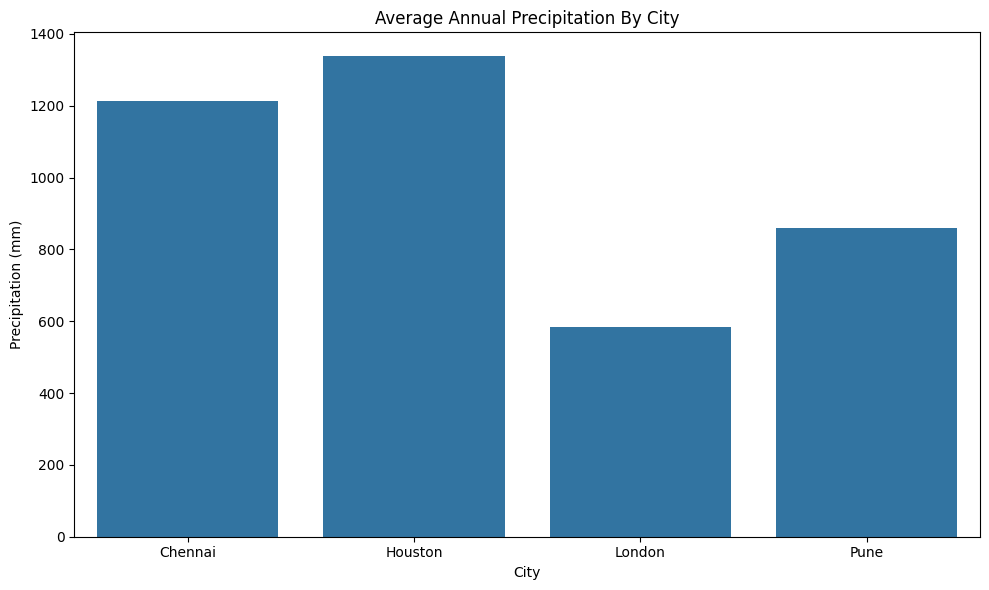

In [ ]:
#Average annual precipitation per city 
yearly_tot=df.groupby(["city","year"])["precipitation"].sum().reset_index()
avg_precip=yearly_tot.groupby("city")["precipitation"].mean().reset_index()
#so here we sum the precip for each year for each city then take its avg because we need avg precip in a year for a city (not daily avg)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_precip,x='city',y='precipitation',errorbar=None)
plt.title("Average Annual Precipitation By City")
plt.xlabel("City")
plt.ylabel("Precipitation (mm)")
plt.tight_layout()
plt.savefig("../output/precipitation_comparison.png")
plt.show()

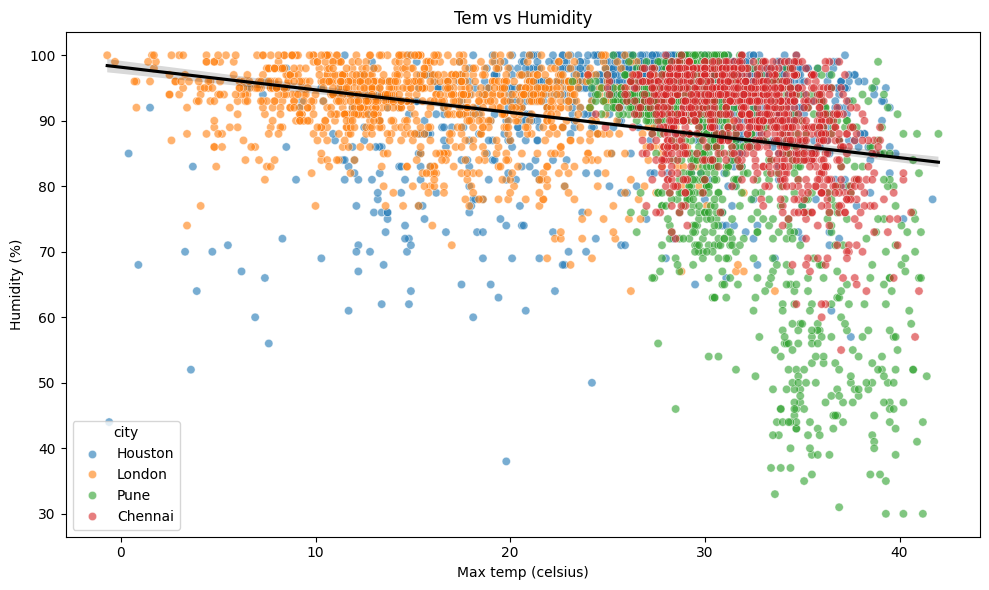

In [ ]:
#Humidity vs Temperature comparison

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='temp_max',y='humidity',hue='city',alpha=0.6)
sns.regplot(data=df,x='temp_max',y='humidity',scatter=False, color='black')
#in the scatterplot each data point represents a day alpha=0.6 improves visibility during overlaps as the points are semi transparent
# scatter=False meaning no extra points only the line...the line is clearly visible above the scatter plot

plt.title("Temp vs Humidity")
plt.xlabel("Max temp (celsius)")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("../output/temp_vs_humidity.png")
plt.show()
#Results
#London - High humidity in Low temp - colder climates
#Chennai - High humidity in High temp - coastal humid climate
#Pune - Low humidity in High temp - dry temp
#Houston - scattered pattern because of storms
#the regression line is downwards meaning the common trend that is higher temperature lower humidity

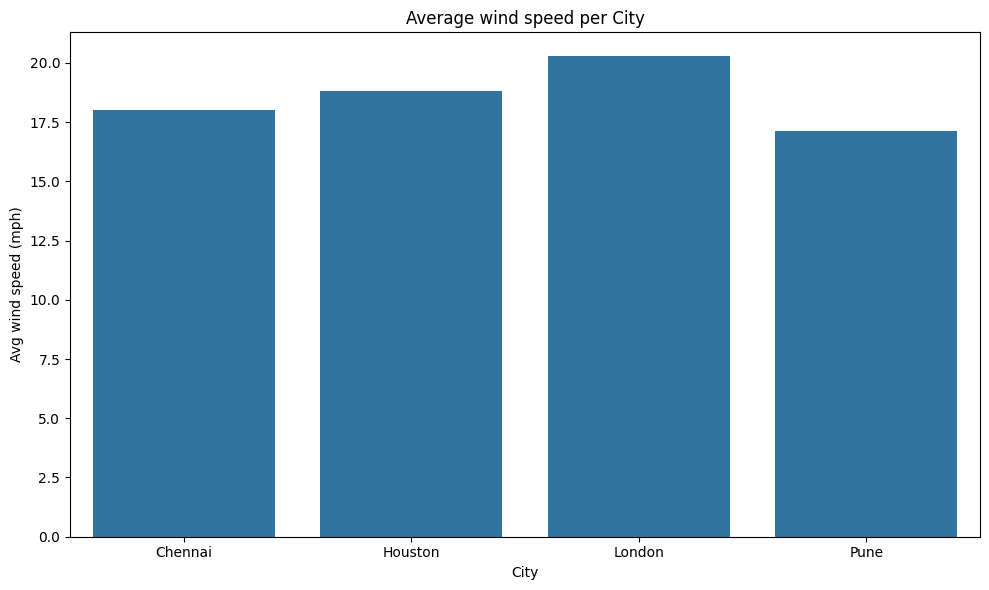

In [ ]:
#Average wind speed per City
avg_wind=df.groupby("city")["wind_speed"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_wind,x="city",y="wind_speed",errorbar=None)
plt.title("Average wind speed per City")
plt.xlabel("City")
plt.ylabel("Avg wind speed (mph)")
plt.tight_layout()
plt.savefig("../output/wind_speed_comparison.png")
plt.show()